# Compare functions using timeit

Compare the performance of different functions to append custom string to items in a list.

In [1]:
# performance checks
# timeit results 
# matlib plots
# refer https://stackoverflow.com/questions/50312305/what-is-the-best-way-to-interleave-two-lists
# input l=['a','b','c'] 
# output out_l = ['a','a_1','b','b_2','c','c_3']

In [2]:
# import libraries
from timeit import timeit
from itertools import chain
import tkinter
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
# function 1 
def fun1(l):
    return [ 
        l[int(i / 2)] + "_" + str(int(i / 2) + 1) if i % 2 != 0 else l[int(i/2)] 
        for i in range(0,2*len(l))
    ]

In [5]:
# function 2
def fun2(l):
    return [
        i for b in [[a, '{}_{}'.format(a, i)] 
        for i, a in enumerate(l, start=1)] 
        for i in b
    ]

In [6]:
# function 3
def fun3(l):
    return [j for i, a in enumerate(l, 1) for j in [a, '{}_{}'.format(a, i)]]

In [7]:
# function 4
def fun4(l):
    return [
        val 
        for pair in zip(l, [f'{k}_{j+1}' for j, k in enumerate(l)]) 
        for val in pair
    ]

In [8]:
# function 5
def fun5(l):
    def _cs1(l):
        for i, x in enumerate(l, 1):
            yield x
            yield f'{x}_{i}'
    return list(_cs1(l))

In [9]:
# function 6
def fun6(l):
    return list(chain.from_iterable(
        zip(l, [f'{x}_{i}' for i, x in enumerate(l, 1)]))
    )

In [10]:
# function 7
def fun7(l):
    out_l = [None] * (len(l) * 2)
    out_l[::2] = l
    out_l[1::2] = [f'{x}_{i}' for i, x in enumerate(l, 1)]
    return out_l

In [11]:
# create a pandas dataframe 
# index has the list of functions
# columns has the multiplication factor - 
# to increase input list size (thereby complexity)
res = pd.DataFrame(
       index=['fun1', 'fun2', 'fun3', 'fun4', 'fun5', 'fun6', 'fun7'],
       columns=[10, 50, 100, 500, 1000, 5000], # 10000, 50000, 100000], # uncomment to test larger lists
       dtype=float
)

In [12]:
res

,10,50,100,500,1000,5000
fun1,NaN,NaN,NaN,NaN,NaN,NaN
fun2,NaN,NaN,NaN,NaN,NaN,NaN
fun3,NaN,NaN,NaN,NaN,NaN,NaN
fun4,NaN,NaN,NaN,NaN,NaN,NaN
fun5,NaN,NaN,NaN,NaN,NaN,NaN
fun6,NaN,NaN,NaN,NaN,NaN,NaN
fun7,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# each function to be looped over the mul.factors
# timeit is used and output to dataframe
for f in res.index: 
    for c in res.columns:
        l = ['a', 'b', 'c', 'd'] * c
        stmt = '{}(l)'.format(f)       # f(l)
        setp = 'from __main__ import l, {}'.format(f)
        res.at[f, c] = timeit(stmt, setp, number=50)

In [14]:
res

,10,50,100,500,1000,5000
fun1,0.003351,0.018561,0.029885,0.130170,0.263923,1.288632
fun2,0.001179,0.005826,0.011566,0.058041,0.116260,0.626511
fun3,0.001086,0.005334,0.010573,0.053296,0.104974,0.544260
fun4,0.000832,0.004125,0.008007,0.039994,0.079164,0.412970
fun5,0.000723,0.003319,0.006584,0.032964,0.065645,0.349821
fun6,0.000648,0.003194,0.006422,0.030469,0.062949,0.323278
fun7,0.000549,0.002699,0.005125,0.026020,0.052308,0.281226


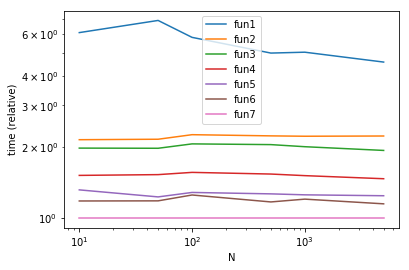

In [15]:
# using matplotlib to plot 
ax = res.div(res.min()).T.plot(loglog=True) 
ax.set_xlabel("N"); 
ax.set_ylabel("time (relative)");

In [17]:
# plt.show()